In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_calc = pd.read_csv('../result/calc.csv',sep=' ', index_col=False)

In [3]:
# data_calc.N += 1
data_calc

,N,<x>,<y>,<R>,<x^2>,<y^2>,<Δx^2>,<Δy^2>,<ΔR^2>
0,1,-4.12244,-0.178141,4.12629,1.390940e+07,2.202380e+05,1.390940e+07,2.202380e+05,1.412970e+07
1,2,-5.85781,-0.330076,5.86710,1.714170e+07,5.274900e+05,1.714160e+07,5.274900e+05,1.766910e+07
2,3,-8.63260,-0.024694,8.63264,2.182960e+07,1.098380e+06,2.182950e+07,1.098380e+06,2.292790e+07
3,4,16.97170,-0.252354,16.97360,7.850920e+08,1.260640e+06,7.850910e+08,1.260640e+06,7.863520e+08
4,5,20.33760,-0.402197,20.34160,7.882550e+08,1.387680e+07,7.882540e+08,1.387680e+07,8.021310e+08
...,...,...,...,...,...,...,...,...,...
497,498,-8763.36000,15008.800000,17379.90000,8.204710e+13,2.356970e+14,8.204700e+13,2.356970e+14,3.177440e+14
498,499,-8764.33000,15009.300000,17380.80000,8.204710e+13,2.356970e+14,8.204700e+13,2.356970e+14,3.177440e+14
499,500,-8763.71000,15008.900000,17380.10000,8.204710e+13,2.356970e+14,8.204700e+13,2.356970e+14,3.177440e+14
500,1000,-7956.52000,15039.600000,17014.60000,8.238820e+13,2.357340e+14,8.238810e+13,2.357330e+14,3.181220e+14


## Апроксимация

In [4]:
index_end = 2000
index_start = 0
x = np.log10(data_calc['N'][index_start:index_end])
y = np.log10(data_calc['<ΔR^2>'][index_start:index_end])

In [6]:
lg_mu = (y.mean()*(x**2).mean() - (x*y).mean()*x.mean())/((x**2).mean() - x.mean()**2)
mu = 10**lg_mu
print(f'lg_mu: {lg_mu}, mu: {mu}')

lg_mu: 2.868975542794986, mu: 739.563625511042


In [7]:
nu = ((x*y).mean() - y.mean()*x.mean())/((x**2).mean() - x.mean()**2)
print(f'nu: {nu}')

nu: 4.370521634126285


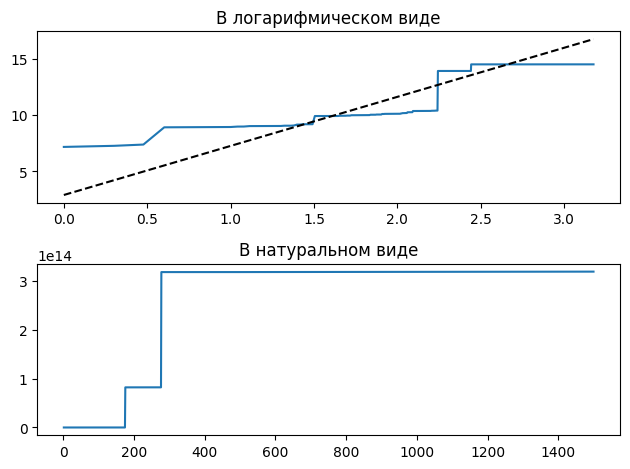

In [9]:
plt.figure()

plt.subplot(2, 1, 1) 

x = np.log10(data_calc['N'][index_start:index_end])
y = np.log10(data_calc['<ΔR^2>'][index_start:index_end])
plt.title('В логарифмическом виде')
plt.plot(x, y)
plt.plot(x, lg_mu + nu * x,'k--', label='Аппроксимация')

plt.subplot(2, 1, 2) 
N_list = data_calc['N'][index_start:index_end]
R2_list = data_calc['<ΔR^2>'][index_start:index_end]
plt.title('В натуральном виде')
plt.plot(N_list, R2_list)
# plt.plot(N_list, mu*(N_list**nu),'k--', label='Аппроксимация')

plt.tight_layout() 
plt.show()

In [29]:
data_first_particle = pd.read_csv('../result_new/first_particle.csv',sep=' ', index_col=False)

FileNotFoundError: [Errno 2] No such file or directory: '../result_new/first_particle.csv'

In [171]:
data_first_particle

,x,y
0,0.000000e+00,-2.787590e+00
1,0.000000e+00,9.074600e+00
2,0.000000e+00,4.928220e+00
3,-4.820340e+00,4.928220e+00
4,-5.070020e+00,4.928220e+00
...,...,...
1999994,3.190510e+06,-1.594740e+06
1999995,3.190510e+06,-1.594740e+06
1999996,3.190510e+06,-1.594740e+06
1999997,3.190510e+06,-1.594750e+06


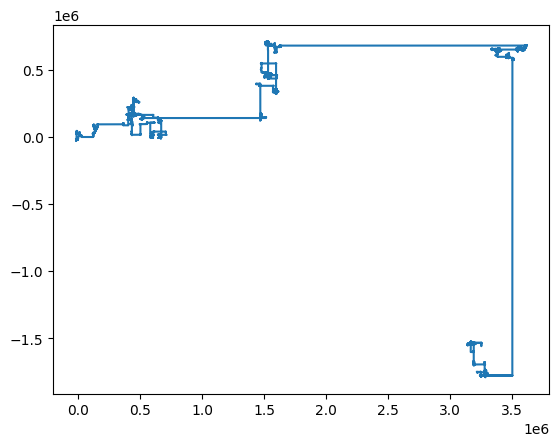

In [172]:
plt.plot(data_first_particle.x,data_first_particle.y)

In [173]:
data_last_vals = pd.read_csv('../result_new/last_vals.csv',sep=' ', index_col=False)

In [174]:
data_last_vals

,x,y
0,3190510.0,-1594750.0
1,4460100.0,19459100.0
2,-1939400.0,-682322.0
3,1650350.0,-7355390.0
4,7269010.0,-3637330.0
...,...,...
149995,-2608940.0,-1095690.0
149996,1742090.0,1160570.0
149997,-9898000.0,3091490.0
149998,22980800.0,3153010.0


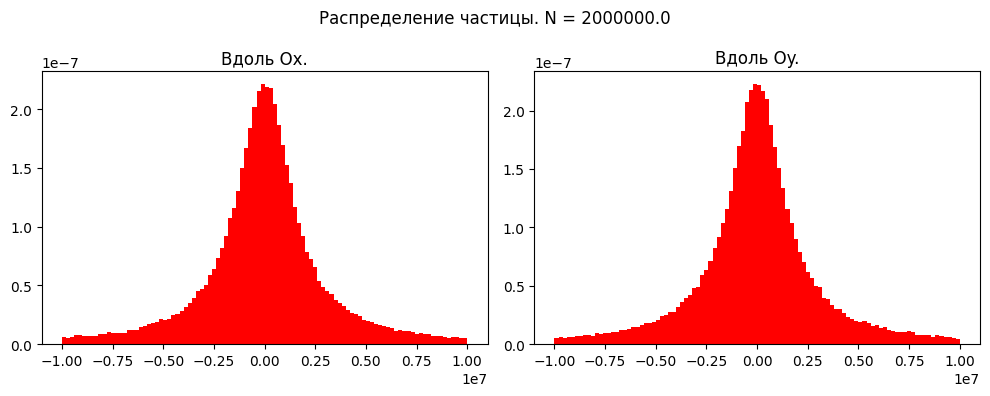

In [175]:
bin_cnt = 100
bin_w = 1/bin_cnt
_idx = 9
plt.figure(figsize=(10, 4))
plt.suptitle(f'Раcпределение частицы. N = {2e6}')

plt.subplot(1,2,1)
plt.hist(data_last_vals.x, bin_cnt, facecolor='r', density=True, label='E(X)', range=(-1e7, 1e7))
plt.title(f'Вдоль Ox.')

plt.subplot(1,2,2)
plt.hist(data_last_vals.y, bin_cnt, facecolor='r', density=True, label='E(X)', range=(-1e7, 1e7))
plt.title(f'Вдоль Oy.')

plt.tight_layout()
plt.show()